# Accident Severity Notebook

[comment]: <> (A description of the problem and a discussion of the background. 15 marks)
[comment]: <> (A description of the data and how it will be used to solve the problem. 15 marks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Collisions.csv')
df.head()

C:\Users\Chris\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.344896,47.717173,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,1,0,0,2013/03/14 00:00:00+00,3/14/2013 5:30:00 PM,Driveway Junction,18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,-122.376467,47.543774,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,NaN,NaN,2,Injury Collision,Pedestrian,7,1,0,1,1,0,0,2006/01/15 00:00:00+00,1/15/2006 5:35:00 PM,Mid-Block (not related to intersection),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,-122.360735,47.701487,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2019/09/09 00:00:00+00,9/9/2019 3:32:00 PM,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.297415,47.599233,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,,NaN,1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2019/12/19 00:00:00+00,12/19/2019,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.368001,47.653585,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,,NaN,0,Unknown,NaN,1,0,0,0,0,0,0,2013/03/27 00:00:00+00,3/27/2013,Mid-Block (not related to intersection),0.0,NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [5]:
df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,214050.000000,214050.000000,221525.000000,221525.000000,221525.000000,71936.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221524.000000,1.272050e+05,221525.000000,2.215250e+05
mean,-122.330756,47.620196,110763.000000,144824.873233,145053.886627,37626.275537,2.226941,0.038118,0.027360,1.730482,0.373935,0.015208,0.001693,13.383042,7.971063e+06,261.135903,9.577244e+03
std,0.030056,0.056048,63948.903529,89222.567072,89598.173976,51968.207339,1.470050,0.201766,0.164537,0.829754,0.732077,0.158052,0.044888,7.300182,2.611523e+06,3246.962907,7.146156e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577133,55382.000000,71668.000000,71668.000000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330363,47.616033,110763.000000,127252.000000,127252.000000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,166144.000000,209935.000000,210155.000000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221525.000000,334020.000000,335520.000000,764413.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
# Remove time from date time string
df['INCDATE']=df['INCDATE'].str[:10]

# Add year month and day columns
df[['YEAR', 'MONTH','DAY']]=df["INCDATE"].str.split("/", expand=True)

# Transform String into DateTime
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

# Get day of the week
# Monday=0, Sunday=6.
df['DAYOFWEEK'] = df['INCDATE'].dt.dayofweek

In [7]:
# Droping unnesesary columns
dropcol_list = ['X', 'Y', 'INCKEY', 
                'COLDETKEY', 'REPORTNO', 'EXCEPTRSNCODE', 
                'EXCEPTRSNDESC', 'STATUS', 'INTKEY', 'INCDATE',
                'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC', 
                'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 
                'SEGLANEKEY', 'CROSSWALKKEY']
df.drop(dropcol_list, axis=1, inplace = True)

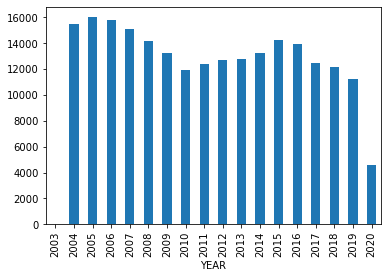

In [29]:
# Number of incidents each year
df.groupby('YEAR').size().plot.bar()

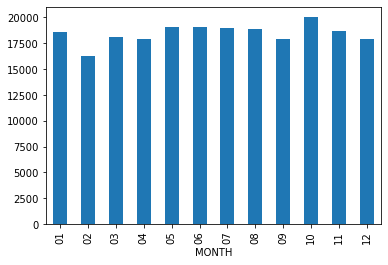

In [32]:
# Number of incidents by month
df.groupby('MONTH').size().plot.bar()

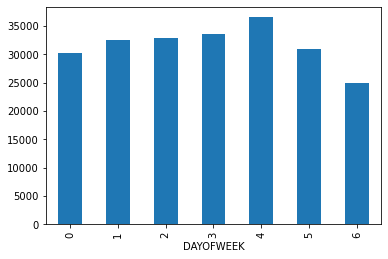

In [35]:
# Number of incidents by day of the week
# Monday=0, Sunday=6.
df.groupby('DAYOFWEEK').size().plot.bar()

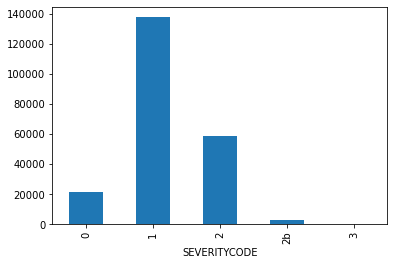

In [37]:
# Severity Code Distribution
df.groupby('SEVERITYCODE').size().plot.bar()

In [38]:
# Severity Code Distribution qty
df.groupby('SEVERITYCODE').size()

SEVERITYCODE
0      21615
1     137671
2      58783
2b      3105
3        350
dtype: int64

In [40]:
import sys
print(sys.executable)

C:\Users\Chris\anaconda3\python.exe


In [43]:
! C:\Users\Chris\anaconda3\python.exe -m pip install wordcloud

In [56]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [50]:
df.dtypes

OBJECTID            int64
ADDRTYPE           object
LOCATION           object
SEVERITYCODE       object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INJURIES            int64
SERIOUSINJURIES     int64
FATALITIES          int64
JUNCTIONTYPE       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
HITPARKEDCAR       object
YEAR               object
MONTH              object
DAY                object
DAYOFWEEK           int64
dtype: object

0            AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST
1          35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST
2                                3RD AVE NW AND NW 100TH ST
3                        M L KING JR WAY S AND S JACKSON ST
4               W EWING ST BETWEEN 6TH AVE W AND W EWING PL
                                ...                        
221520    DELRIDGE WAY SW BETWEEN SW ANDOVER ST AND SW D...
221521    NE NORTHLAKE PL BETWEEN PASADENA PL NE AND 7TH...
221522      48TH AVE S BETWEEN S GARDEN ST AND S OTHELLO ST
221523                               2ND AVE AND BATTERY ST
221524      15TH AVE E BETWEEN E DENNY WAY AND E JOHN SR ST
Name: LOCATION, Length: 221525, dtype: object


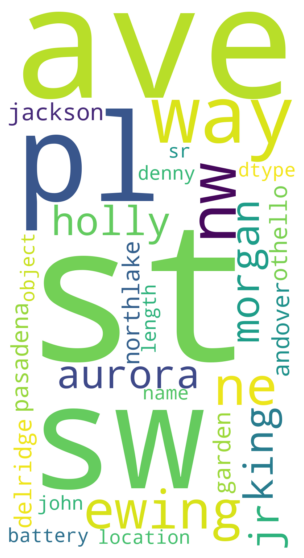

In [59]:
words = "".join(str(df['LOCATION']))
print(words)

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [46]:
# Locate NA values and encode, replace or drop
df.isna().sum()/len(df)

OBJECTID           0.000000
ADDRTYPE           0.016757
LOCATION           0.020720
SEVERITYCODE       0.000005
SEVERITYDESC       0.000000
COLLISIONTYPE      0.118781
PERSONCOUNT        0.000000
PEDCOUNT           0.000000
PEDCYLCOUNT        0.000000
VEHCOUNT           0.000000
INJURIES           0.000000
SERIOUSINJURIES    0.000000
FATALITIES         0.000000
JUNCTIONTYPE       0.054053
INATTENTIONIND     0.863726
UNDERINFL          0.118691
WEATHER            0.119639
ROADCOND           0.119273
LIGHTCOND          0.120041
PEDROWNOTGRNT      0.976549
SPEEDING           0.955179
HITPARKEDCAR       0.000000
YEAR               0.000000
MONTH              0.000000
DAY                0.000000
DAYOFWEEK          0.000000
dtype: float64